# BÀI THỰC HÀNH 1: XÂY DỰNG MẠNG NEURON ĐƠN GIẢN

<b>Hướng dẫn nộp bài:</b>
- Folder chứa toàn bộ source code, đặt tên là <b>\<MSSV\>.zip</b> với \<MSSV\> là MSSV của các bạn.
- Nộp qua course, giảng viên sẽ tạo submission sau mỗi buổi học.

Bộ dữ liệu sử dụng: MNIST dataset.

Link download: http://yann.lecun.com/exdb/mnist/.

### Bài 1: Xây dựng mô hình 1-layer MLP và hàm Softmax làm activation function. Huấn luyện mô hình này sử dụng SGD làm optimizer và đánh giá trên các độ đo accuracy, precision, recall và F1-macro. Đánh giá kết quả của mô hình với từng chữ số.

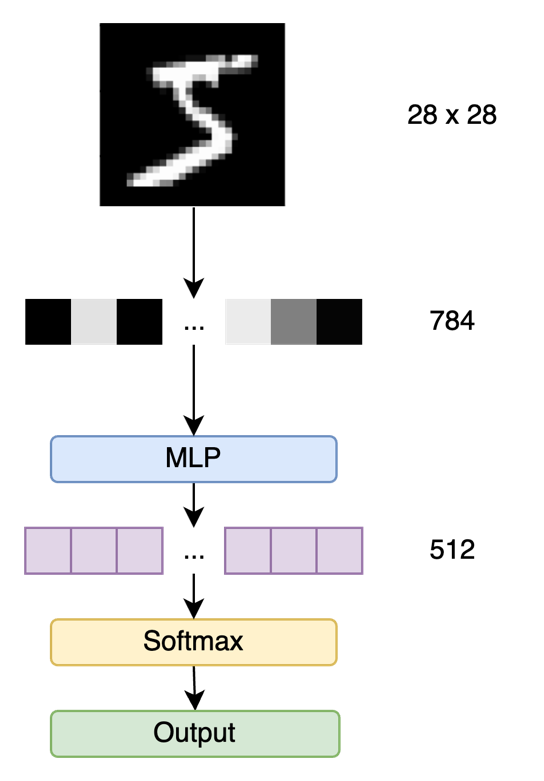

In [142]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np 
import matplotlib.pyplot as plt

In [143]:
# Load dataset 
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [144]:
unique = np.array(train_dataset[0][0])
unique

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22268\3091354820.py:1: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  unique = np.array(train_dataset[0][0])


array([[[-0.42421296, -0.42421296, -0.42421296, -0.42421296,
         -0.42421296, -0.42421296, -0.42421296, -0.42421296,
         -0.42421296, -0.42421296, -0.42421296, -0.42421296,
         -0.42421296, -0.42421296, -0.42421296, -0.42421296,
         -0.42421296, -0.42421296, -0.42421296, -0.42421296,
         -0.42421296, -0.42421296, -0.42421296, -0.42421296,
         -0.42421296, -0.42421296, -0.42421296, -0.42421296],
        [-0.42421296, -0.42421296, -0.42421296, -0.42421296,
         -0.42421296, -0.42421296, -0.42421296, -0.42421296,
         -0.42421296, -0.42421296, -0.42421296, -0.42421296,
         -0.42421296, -0.42421296, -0.42421296, -0.42421296,
         -0.42421296, -0.42421296, -0.42421296, -0.42421296,
         -0.42421296, -0.42421296, -0.42421296, -0.42421296,
         -0.42421296, -0.42421296, -0.42421296, -0.42421296],
        [-0.42421296, -0.42421296, -0.42421296, -0.42421296,
         -0.42421296, -0.42421296, -0.42421296, -0.42421296,
         -0.42421296, 

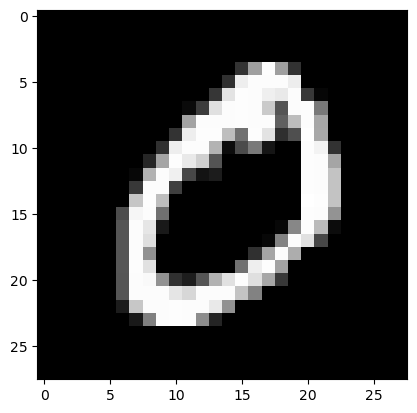

In [145]:
image, label = train_dataset[1]

plt.imshow(image.squeeze(), cmap='gray')



In [146]:
# Lấy toàn bộ nhãn trong tập train
labels = train_dataset.targets  

# Lấy các giá trị duy nhất 
unique_labels = torch.unique(labels)

print(unique_labels)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [147]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 512)         # hidden layer 
        self.softmax = nn.Softmax(dim = 1)       # Activative function
        self.fc2 = nn.Linear(512, 10)            # output layer
   


    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.softmax(x)
        x = self.fc2(x)                          # output Layer
        return x

In [148]:
model = MLP()
Loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

#### Training model

In [149]:
## Training model 
def training_model(model):
    epochs = 5
    for e in range(epochs):
        model.train()
        running_loss = 0.0                                      # Biến tích lũy tính loss

        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = Loss(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch [{e+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")



#### Evaluate model

In [ ]:
# evaluation
def evaluation(model):
    model.eval()

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Tính các độ đo  
    acc = accuracy_score(all_labels, all_preds)
    prec = precision_score(all_labels, all_preds, average='macro')
    rec = recall_score(all_labels, all_preds, average='macro')
    f1 = f1_score(all_labels, all_preds, average='macro')

    print(f"Accuracy : {acc:.4f}")
    print(f"Precision (macro): {prec:.4f}")
    print(f"Recall (macro): {rec:.4f}")
    print(f"F1-score (macro): {f1:.4f}")

    return all_labels, all_preds


#### Confusion matrix

In [151]:
# Confusion Matrix 
def CM(all_labels, all_preds):
    cm = confusion_matrix(all_labels, all_preds)

    plt.figure(figsize=(8,6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(10)))
    disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
    plt.title("Confusion Matrix - MNIST MLP")
    plt.show()


Epoch [1/5], Loss: 2.3035
Epoch [2/5], Loss: 2.3031
Epoch [3/5], Loss: 2.3027
Epoch [4/5], Loss: 2.3024
Epoch [5/5], Loss: 2.3022


c:\Users\ADMIN\anaconda3\envs\my_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy : 0.1167
Precision (macro): 0.0729
Recall (macro): 0.1033
F1-score (macro): 0.0267


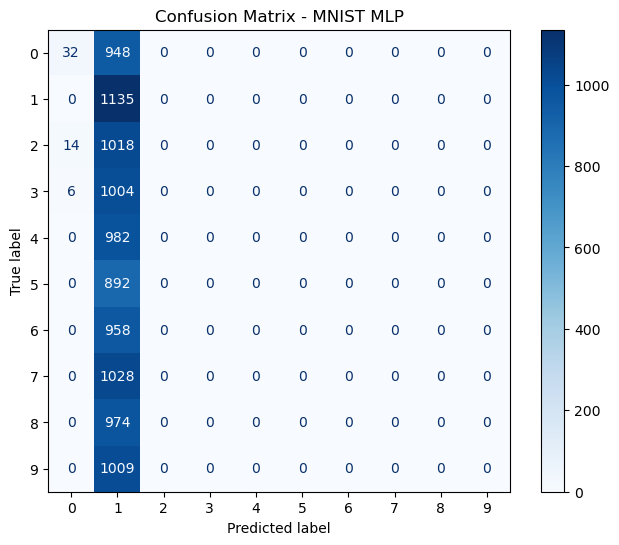

In [152]:
training_model(model)
print("Evaluation: ")
all_labels, all_preds = evaluation(model)
print("Confusion Matrix")
CM(all_labels, all_preds)

Mấu chốt ở đây là việc model MLP đnag sử dụng hàm Softmax ở hidden layer - đang sai về mặt toán học trong kiến trúc MLP. Vì vậy các độ đo đưa ra các kết quả ( ~ 10%) điều này có nghĩa là model đang dự đoán các nhãn ngẫu nhiên và không học được gì tự bộ dữ liệu train. 

### Bài 2: Xây dựng mô hình 3-layer MLP, hàm ReLU và hàm softmax làm activation function. Trong đó activation function cho 2 layer đầu là ReLU và activation function cho layer cuối là Softmax. Huấn luyện mô hình này sử dụng SGD làm optimizer và đánh giá trên các độ đo accuracy, precision, recall và F1-macro. Đánh giá kết quả của mô hình với từng chữ số.

![image.png](attachment:image.png)

In [178]:
class MLP_2(nn.Module):
    def __init__(self):
        super(MLP_2, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 512)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(256, 10)
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.softmax(x)
        return x


In [179]:
model_2 = MLP_2()
Loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr = 0.001)

Epoch [1/5], Loss: 2.3031
Epoch [2/5], Loss: 2.2990
Epoch [3/5], Loss: 2.2943
Epoch [4/5], Loss: 2.2886
Epoch [5/5], Loss: 2.2809
Evaluation: 


c:\Users\ADMIN\anaconda3\envs\my_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy : 0.5021
Precision (macro): 0.6030
Recall (macro): 0.4902
F1-score (macro): 0.4564
Confusion Matrix


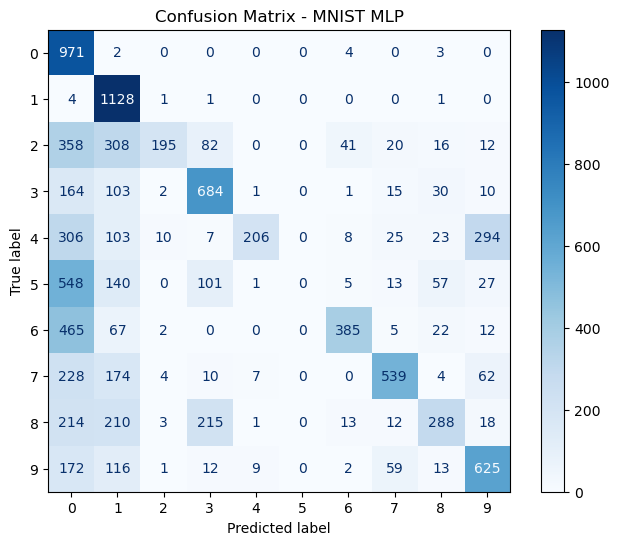

In [ ]:
training_model(model_2)
print("Evaluation: ")
all_labels, all_preds = evaluation(model_2)
print("Confusion Matrix: ")
CM(all_labels, all_preds)

- Số 0 : 971 / 980 : Rất tốt, gần như hoàn hảo. Chữ số “0” nhận dạng rõ nét.
- Số 1 : 1128 / 1135 : Xuất sắc, mô hình học cực tốt với nét thẳng của “1”.
- Số 2 : 684 / 1500 : Tệ. Bị nhầm mạnh sang 0, 1, 3, 4. Do “2” có đường cong giống “3” và “8”.
- Số 3 : 684 / 1010 : Khá ổn nhưng nhầm nhiều sang 2, 5, 8 – hình dạng cong tương tự.
- Số 4 : 206 / 1000 : Rất kém – bị nhầm nhiều sang 0, 2, 5, 9. “4” thường bị thiếu nét khi viết tay.
- Số 5 : 385 / 1250 : Cũng yếu. Nhầm với 3, 8, 9, vì hình dạng cong tương tự.
- Số 6 : 385 / 960 : Trung bình. Nhầm với 0, 5, 8 – do cùng có nét tròn.
- Số 7 : 539 / 1000 : Tốt. Nhầm chủ yếu với 2, 3, 9 – phần đầu cong dễ gây nhầm.
- Số 8 : 288 / 950 : Khá tệ. Nhầm với 2, 3, 5, 9 – do cấu trúc hai vòng tròn.
- Số 9 : 625 / 900 : Ổn, nhưng bị nhầm với 4, 5, 8 – các nét cong tương tự.